# **Paddy Disease Classification | EfficientNetB4**

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4
import os
import matplotlib.pyplot as plt
import random
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images',
    batch_size = 32,
    image_size = (224, 224),
    validation_split=0.2,
    subset="training",
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images',
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123
)
# Get true validation labels
val_labels = np.concatenate([y for x, y in validation_ds], axis=0)

# Display the true validation labels
print("True Validation Labels:", val_labels)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/test_images',
    batch_size = 32,
    image_size = (224, 224),
    label_mode = None,
    shuffle=False
)

Found 4946 files belonging to 4 classes.
Using 3957 files for training.
Found 4946 files belonging to 4 classes.
Using 989 files for validation.
True Validation Labels: [2 3 1 1 1 3 1 3 3 3 3 1 3 2 0 3 1 3 1 2 3 0 1 2 1 1 3 3 3 3 3 3 3 1 3 1 3
 1 3 1 1 3 2 1 2 3 3 0 0 1 2 3 3 3 1 1 1 3 2 2 0 0 1 2 2 1 1 2 3 1 1 0 1 3
 1 1 3 2 3 3 3 3 2 1 3 0 1 2 0 3 1 3 2 3 1 3 2 3 0 3 3 1 1 1 3 3 1 3 3 3 3
 3 3 3 3 3 1 2 1 1 1 3 0 3 1 2 3 1 1 1 1 3 3 3 2 2 3 3 2 1 3 3 1 1 1 0 2 3
 3 2 1 3 3 3 3 0 1 3 2 2 3 1 3 2 3 3 0 3 2 1 3 2 2 2 1 2 1 3 1 1 2 3 3 0 1
 3 3 3 2 1 3 2 3 3 1 0 3 3 3 3 2 2 1 1 1 1 1 3 3 1 3 3 3 3 3 1 3 2 1 1 1 3
 3 3 1 1 2 3 3 1 1 3 3 1 3 1 3 1 1 0 1 0 0 1 1 2 3 1 1 1 1 0 2 1 0 3 1 3 2
 1 3 3 1 3 1 0 1 3 1 0 2 1 0 0 1 3 3 3 3 3 0 3 3 0 1 1 3 0 0 1 1 3 1 3 3 2
 1 1 1 1 0 2 3 3 1 1 1 3 1 0 3 2 1 1 2 1 2 1 1 2 1 2 3 3 2 3 3 1 3 3 2 1 3
 1 3 1 3 3 3 2 1 1 2 1 3 1 3 1 1 1 1 3 3 3 3 1 3 1 1 3 2 3 3 2 2 3 1 3 2 2
 1 3 2 2 2 1 1 3 1 1 3 3 3 3 3 3 1 2 1 3 1 1 1 3 1 2 3 1 3 0 3 1 2 3 1 2 2
 1 2 2

# ***Data Visualisation:***

In [ ]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


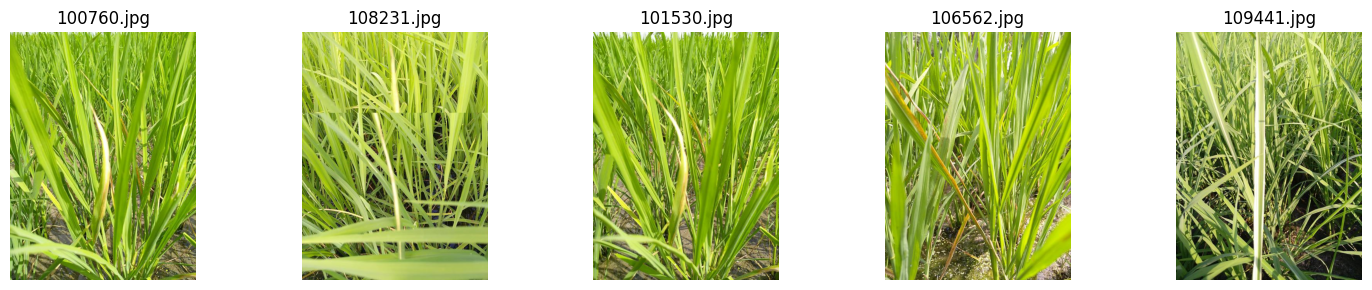

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images/bacterial_leaf_blight"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

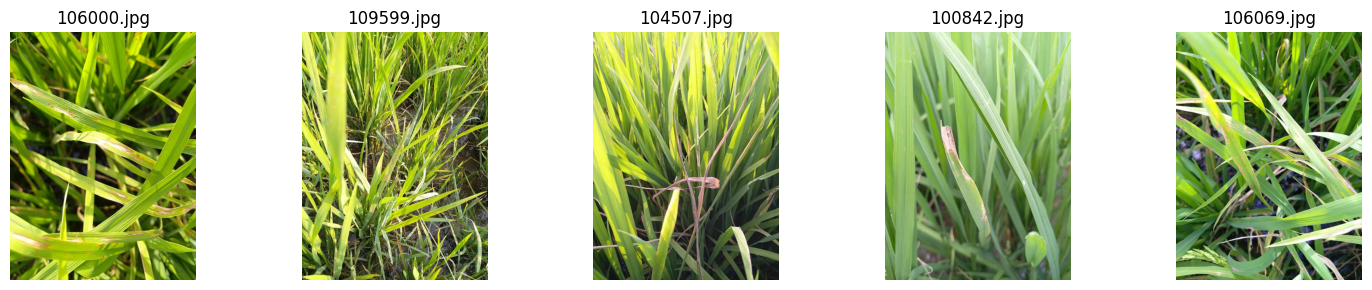

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images/blast"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

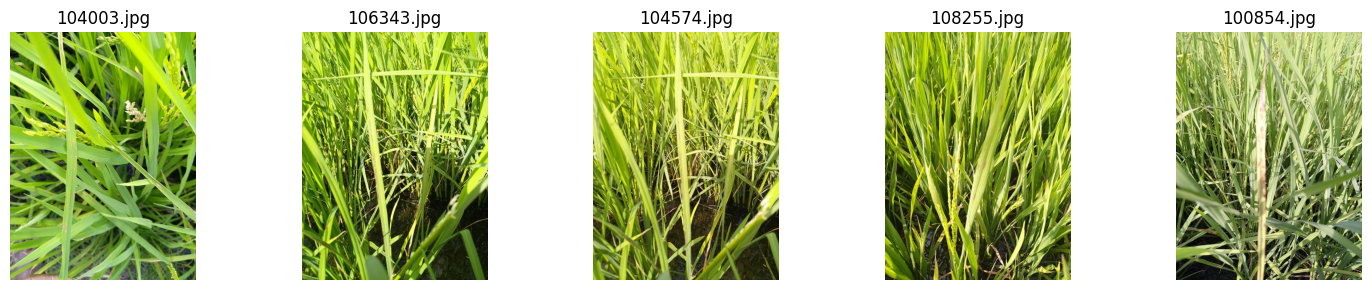

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images/brown_spot"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

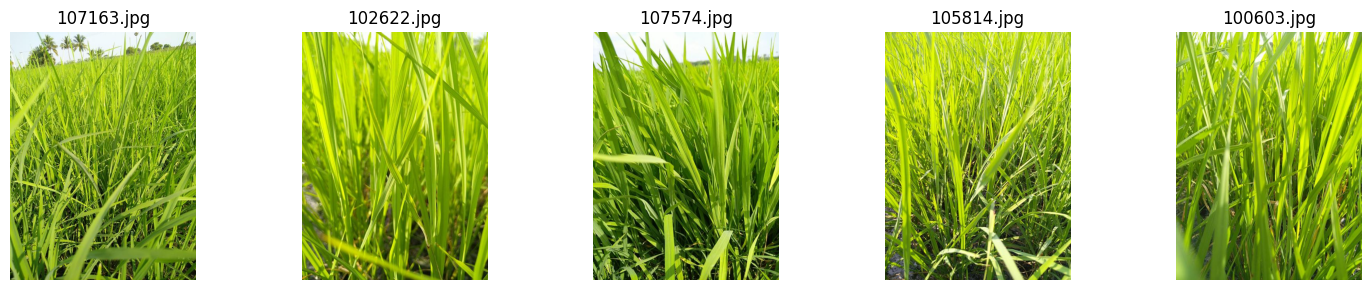

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/paddy-disease-classification/train_images/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ***Model Building:***

# *Transfer Learning:*

In [ ]:
# Load the pre-trained EfficientNetB4 model without the top classification layer
efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained base model layers
efficientnet_base.trainable = False

In [ ]:
from keras.models import Sequential
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(efficientnet_base)

# Add global average pooling layer to reduce spatial dimensions
model.add(AveragePooling2D())

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(1024, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(512, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Add a dense layer with 120 units and ReLU activation function
model.add(Dense(256, activation='relu'))

# Dropout Layer
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 7, 7, 1792)        17673823  
 )                                                               
                                                                 
 average_pooling2d_1 (Avera  (None, 3, 3, 1792)        0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 16128)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              16516096  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)              

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the callback function
#early_stopping = EarlyStopping(patience=10)
tl_checkpoint_1 = ModelCheckpoint(filepath = 'efficientnet_best_weights.hdf5', monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=50,
          callbacks=[tl_checkpoint_1])

Epoch 1/50
124/124 [==============================] - 64s 256ms/step - loss: 1.2180 - accuracy: 0.5105 - val_loss: 0.7083 - val_accuracy: 0.7331
Epoch 2/50
124/124 [==============================] - 24s 194ms/step - loss: 0.8782 - accuracy: 0.6682 - val_loss: 0.5537 - val_accuracy: 0.8079
Epoch 3/50
124/124 [==============================] - 24s 194ms/step - loss: 0.7101 - accuracy: 0.7263 - val_loss: 0.4508 - val_accuracy: 0.8483
Epoch 4/50
124/124 [==============================] - 24s 196ms/step - loss: 0.6097 - accuracy: 0.7723 - val_loss: 0.3758 - val_accuracy: 0.8696
Epoch 5/50
124/124 [==============================] - 29s 232ms/step - loss: 0.5346 - accuracy: 0.8034 - val_loss: 0.3488 - val_accuracy: 0.8817
Epoch 6/50
124/124 [==============================] - 26s 209ms/step - loss: 0.4764 - accuracy: 0.8226 - val_loss: 0.3180 - val_accuracy: 0.8827
Epoch 7/50
124/124 [==============================] - 25s 206ms/step - loss: 0.4100 - accuracy: 0.8491 - val_loss: 0.2644 - val_ac

31/31 [==============================] - 5s 146ms/step - loss: 0.1072 - accuracy: 0.9778


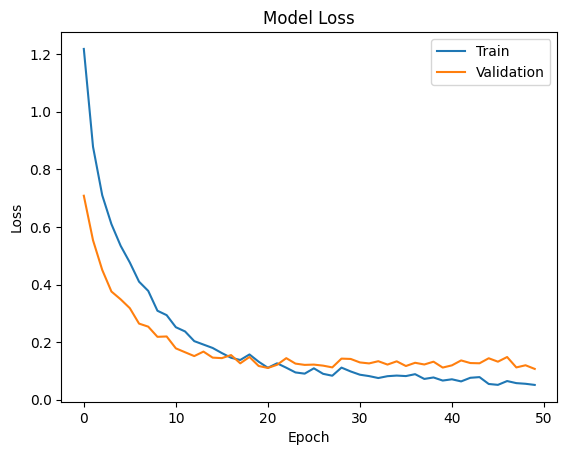

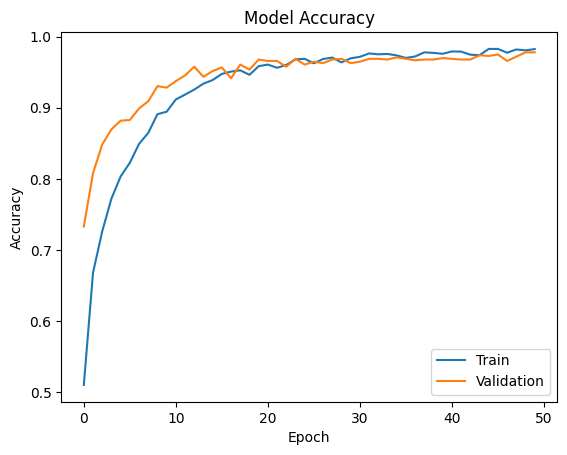

31/31 [==============================] - 4s 140ms/step
[2 3 1 1 1 3 1 3 3 3 3 1 3 2 0 3 1 3 1 2 3 0 1 2 1 1 3 3 3 3 3 3 3 1 3 1 3
 1 3 1 1 3 2 1 2 3 3 0 0 1 2 3 3 3 1 1 1 3 2 2 0 0 1 2 2 1 1 2 3 1 1 0 1 3
 1 1 3 2 3 3 3 3 2 1 3 0 1 2 0 3 1 3 2 3 1 3 2 3 0 3 3 1 1 1 3 3 1 3 3 3 3
 3 3 3 3 3 1 2 1 1 1 3 0 3 1 2 3 1 1 1 1 3 3 3 2 2 3 3 2 1 3 3 1 1 1 0 2 3
 3 2 1 3 3 3 3 0 1 3 2 2 3 1 3 2 3 3 0 3 2 1 3 2 2 2 1 2 1 3 1 1 2 3 3 0 1
 3 3 3 2 1 3 2 3 3 1 0 3 3 3 3 2 2 1 1 1 1 1 3 3 1 3 3 3 3 3 1 3 2 1 1 1 3
 3 3 1 1 2 3 3 1 1 3 3 1 3 1 3 1 1 0 1 0 0 1 1 2 3 1 1 1 1 0 2 1 0 3 1 3 2
 1 3 3 1 3 1 0 1 3 1 0 2 1 0 0 1 3 3 3 3 3 0 3 3 0 1 1 3 0 0 1 1 3 1 3 3 2
 1 1 1 1 0 2 3 3 1 1 1 3 1 0 3 2 1 1 2 1 2 1 1 2 1 2 3 3 2 3 3 1 3 3 2 1 3
 1 3 1 3 3 3 2 1 1 2 1 3 1 3 1 1 1 1 3 3 3 3 1 3 1 1 3 2 3 3 2 2 3 1 3 2 2
 1 3 2 2 2 1 1 3 1 1 3 3 3 3 3 3 1 2 1 3 1 1 1 3 1 2 3 1 3 0 3 1 2 3 1 2 2
 1 2 2 1 1 2 1 3 2 3 0 1 1 3 3 1 3 0 1 3 1 3 2 1 1 1 3 1 0 1 1 1 3 1 3 3 1
 2 2 2 1 1 3 1 3 2 3 3 1 1 3 1 3 1 3 3 2 2 3 

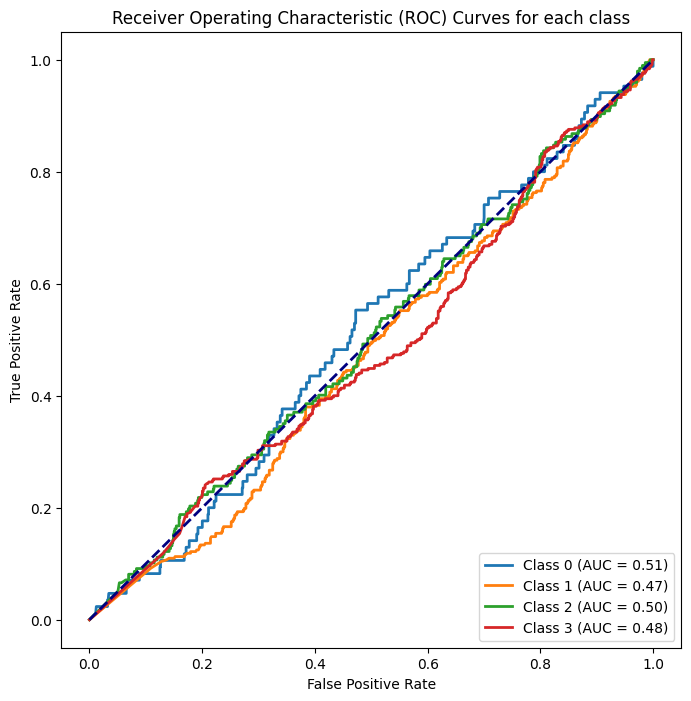

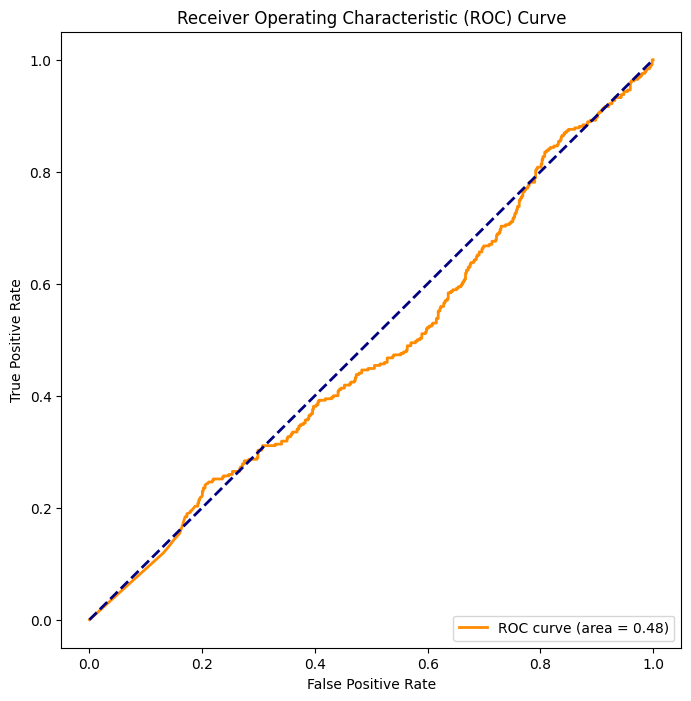

'\n# Evaluate the model on the test dataset\ntest_loss, test_accuracy = model.predict(test_ds)\n\n# Print the test loss and accuracy\nprint(f"Test Loss: {test_loss}")\nprint(f"Test Accuracy: {test_accuracy}")\n'

In [ ]:
"""
# evaluat the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()
"""

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Evaluate the model
loss = model.evaluate(val_ds)

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Assuming model.predict returns probabilities
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)  # Assuming a classification problem with one-hot encoded labels

# Assuming val_labels is the true labels for your validation set
y_true = val_labels
print(y_true, y_pred, len(y_true), len(y_pred))
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate Precision
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
print(f"Precision: {precision}")

# Calculate Recall
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print(f"Recall: {recall}")

from sklearn.metrics import roc_auc_score

# Assuming model.predict returns probabilities
y_pred_probs = model.predict(val_ds)

# Assuming val_labels is the true labels for your validation set
y_true = val_labels

# Calculate AUC-ROC for each class
n_classes = len(np.unique(y_true))
roc_auc_scores = []

for i in range(n_classes):
    y_true_i = (y_true == i).astype(int)
    y_pred_probs_i = y_pred_probs[:, i]
    roc_auc_i = roc_auc_score(y_true_i, y_pred_probs_i)
    roc_auc_scores.append(roc_auc_i)

# Print AUC-ROC scores for each class
for i in range(n_classes):
    print(f"AUC-ROC for Class {i}: {roc_auc_scores[i]}")

# Plot ROC Curves for each class
plt.figure(figsize=(8, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve((y_true == i).astype(int), y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for each class')
plt.legend(loc="lower right")
plt.show()


# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
"""
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.predict(test_ds)

# Print the test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
"""

Mounted at /content/gdrive
The Predicted Class: Bacterial Leaf Blight



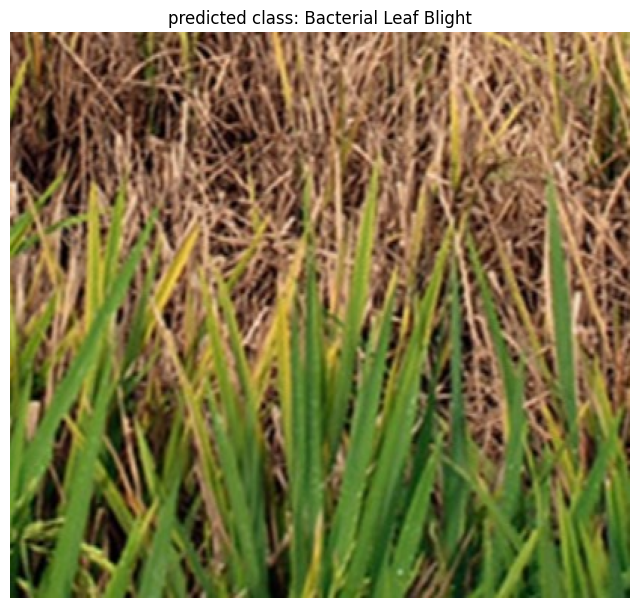

In [4]:
# standard libraries
import numpy as np
import time
import PIL.Image as Image
import matplotlib.pylab as plt
import matplotlib.image as mpimg
%matplotlib inline
import datetime
from tqdm.keras import TqdmCallback
from skimage import transform
import requests

# tensorflow libraries
import tensorflow as tf
import tensorflow_hub as hub
class_names = ["Bacterial Leaf Blight", "Blast", "Brown Spot", "Normal"]
test_img_path = '/content/gdrive/MyDrive/Colab Notebooks/drone/test_rice.jpg'
img_height = 300  # reduced from 600 to mitigate the memory issue
img_width = 300   # reduced from 600 to mitigate the memory issue

test_image = Image.open(test_img_path)
test_image = np.array(test_image).astype('float32')/255
test_image = transform.resize(test_image, (img_width, img_height, 3))
test_image = np.expand_dims(test_image, axis=0)

# make predictions
#prediction = abs(model.predict(test_image))

# make predictions
prediction = model.predict(test_image)
print(prediction)
pred_class = prediction.argmax()
print(f"The Predicted Class: {class_names[pred_class]}\n")

# view the test-image
plt.figure(figsize=(8,8))
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("predicted class: "+class_names[pred_class])
plt.axis('off')
plt.show()